<hr style="height:.7px;border:none;color:#333;background-color:#333;" />
<hr style="height:.7px;border:none;color:#333;background-color:#333;" />

<b>Apprentice Chef | Analysis Report to Management</b>
<br>
<b>Machine Learning | DAT-5303<b>
<br>
Chiahsin Hsieh
<br>
Hult International Business School<br>
    
<hr style="height:.7px;border:none;color:#333;background-color:#333;" />
<hr style="height:.7px;border:none;color:#333;background-color:#333;" />


In [1]:
# Importing libraries
import pandas as pd                                   # data science essentials
import matplotlib.pyplot as plt                       # essential graphical output
import seaborn as sns                                 # enhanced graphical output                              
import numpy as np                                    # mathematical essentials                    
import statsmodels.formula.api as smf                 # regression modeling
import sklearn.linear_model                           # linear models
import random as rand     

# Importing tools from scikitlearn
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression

# CART Model Packages
import pydotplus                                     # interprets dot objects
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend


# New Packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer                    # customizable scorer
from sklearn.ensemble import RandomForestClassifier        # random forest
from sklearn.ensemble import GradientBoostingClassifier    # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
Apprentice_Chef = pd.read_excel(io = file)

In [2]:
# Changing the features name to the lowercase
Apprentice_Chef.columns = Apprentice_Chef.columns.str.lower()


In [3]:
Apprentice_Chef['log_revenue'] = np.log10(Apprentice_Chef['revenue']+ 0.01)

In [4]:
# Printing out all the features then identify the data type
#print(Apprentice_Chef.columns)

In [5]:
# Missing Value Analysis and Imputation

# creating a dropped dataset to visualize 'fanily_name'
df_dropped = Apprentice_Chef.dropna()

#check if there is any missing values in the dropped dataset
#df_dropped.isnull().sum()

In [6]:
# creating an imputation value
fill = 'NA'

# imputing 'FAMILY_NAME'
Apprentice_Chef['family_name'] = Apprentice_Chef['family_name'].fillna(fill)

In [7]:
# log transforming "continuous variables" and saving it to the dataset
Apprentice_Chef['log_total_meals_ordered']     = np.log10(Apprentice_Chef['total_meals_ordered']+ 0.01)
Apprentice_Chef['log_avg_time_per_site_visit'] = np.log10(Apprentice_Chef['avg_time_per_site_visit']+ 0.01)
Apprentice_Chef['log_avg_prep_vid_time']       = np.log10(Apprentice_Chef['avg_prep_vid_time']+ 0.01)
Apprentice_Chef['log_total_photos_viewed']     = np.log10(Apprentice_Chef['total_photos_viewed']+ 0.01)


In [8]:
# Doing a log transformation for the 3 variables mentioned
Apprentice_Chef['log_avg_time_per_site_visit'] = np.log10(Apprentice_Chef['avg_time_per_site_visit'])
Apprentice_Chef['log_avg_prep_vid_time'] = np.log10(Apprentice_Chef['avg_prep_vid_time'])
Apprentice_Chef['log_total_meals_ordered'] = np.log10(Apprentice_Chef['total_meals_ordered'])

In [9]:
# log transforming "INTERVAL/COUNT " and saving it to the dataset
Apprentice_Chef['log_unique_meals_purch']          =  np.log10(Apprentice_Chef['unique_meals_purch']+ 0.01)
Apprentice_Chef['log_contacts_w_customer_service'] =  np.log10(Apprentice_Chef['contacts_w_customer_service']+ 0.01)
Apprentice_Chef['log_product_categories_viewed']   =  np.log10(Apprentice_Chef['product_categories_viewed']+ 0.01)
Apprentice_Chef['log_cancellations_before_noon']   =  np.log10(Apprentice_Chef['cancellations_before_noon']+ 0.01)
Apprentice_Chef['log_cancellations_after_noon']    =  np.log10(Apprentice_Chef['cancellations_after_noon']+ 0.01)
Apprentice_Chef['log_pc_logins']                   =  np.log10(Apprentice_Chef['pc_logins']+ 0.01)
Apprentice_Chef['log_mobile_logins']               =  np.log10(Apprentice_Chef['mobile_logins']+ 0.01)
Apprentice_Chef['log_weekly_plan']                 =  np.log10(Apprentice_Chef['weekly_plan']+ 0.01)
Apprentice_Chef['log_early_deliveries']            =  np.log10(Apprentice_Chef['early_deliveries']+ 0.01)
Apprentice_Chef['log_late_deliveries']             =  np.log10(Apprentice_Chef['late_deliveries']+ 0.01)
Apprentice_Chef['log_largest_order_size']          =  np.log10(Apprentice_Chef['largest_order_size']+ 0.01)
Apprentice_Chef['log_master_classes_attended']     =  np.log10(Apprentice_Chef['master_classes_attended']+ 0.01)
Apprentice_Chef['log_median_meal_rating']          =  np.log10(Apprentice_Chef['median_meal_rating']+ 0.01)
Apprentice_Chef['log_avg_clicks_per_visit']        =  np.log10(Apprentice_Chef['avg_clicks_per_visit']+ 0.01)

In [10]:
# Counting the number of zeroes 
cancellations_before_noon_zeroes = len(Apprentice_Chef['cancellations_before_noon'][Apprentice_Chef['cancellations_before_noon'] == 0])
cancellations_after_noon_zeroes  = len(Apprentice_Chef['cancellations_after_noon'][Apprentice_Chef['cancellations_after_noon'] == 0])
weekly_plan_zeroes               = len(Apprentice_Chef['weekly_plan'][Apprentice_Chef['weekly_plan'] == 0])
moblie_logins_zeroes             = len(Apprentice_Chef['mobile_logins'][Apprentice_Chef['mobile_logins'] == 0])
master_classes_attended_zeroes   = len(Apprentice_Chef['master_classes_attended'][Apprentice_Chef['master_classes_attended'] == 0])
early_deliveries_zeroes          = len(Apprentice_Chef['early_deliveries'][Apprentice_Chef['early_deliveries'] == 0])
late_deliveries_zeroes           = len(Apprentice_Chef['late_deliveries'][Apprentice_Chef['late_deliveries'] == 0])


# Printing a table of the results
#print(f"""
#                             No\t\t\tYes
#                             -----------------------
#cancellations before noon  | {cancellations_before_noon_zeroes}\t\t{len(Apprentice_Chef) - cancellations_before_noon_zeroes }
#cancellations after noon   | {cancellations_after_noon_zeroes}\t\t{len(Apprentice_Chef) - cancellations_after_noon_zeroes}
#weekly plan                | {weekly_plan_zeroes}\t\t{len(Apprentice_Chef) - weekly_plan_zeroes }
#moblie logins              | {moblie_logins_zeroes}\t\t\t{len(Apprentice_Chef) - moblie_logins_zeroes}
#master classes attended    | {master_classes_attended_zeroes}\t\t{len(Apprentice_Chef) - master_classes_attended_zeroes }
#early deliveries           | {early_deliveries_zeroes}\t\t{len(Apprentice_Chef) - early_deliveries_zeroes }
#late deliveries            | {late_deliveries_zeroes}\t\t{len(Apprentice_Chef) - late_deliveries_zeroes }

#""")

In [11]:
# Dummy variable for the 6 features
Apprentice_Chef['has_cancellations_before_noon']   = 0
Apprentice_Chef['has_cancellations_after_noon']    = 0
Apprentice_Chef['has_weekly_plan']                 = 0
Apprentice_Chef['has_master_classes_attended']     = 0
Apprentice_Chef['has_early_deliveries']            = 0
Apprentice_Chef['has_late_deliveries']             = 0

for index, value in Apprentice_Chef.iterrows():
    
    # cancellations_before_noon
    if Apprentice_Chef.loc[index,'cancellations_before_noon'] > 0:
        Apprentice_Chef.loc[index, 'has_cancellations_before_noon'] = 1

    # cancellations_after_noon
    if Apprentice_Chef.loc[index, 'cancellations_after_noon'] > 0:
        Apprentice_Chef.loc[index, 'has_cancellations_after_noon'] = 1
        
    # weekly_plan
    if Apprentice_Chef.loc[index,'weekly_plan'] > 0:
        Apprentice_Chef.loc[index, 'has_weekly_plan'] = 1

    # master_classes_attended
    if Apprentice_Chef.loc[index, 'master_classes_attended'] > 0:
        Apprentice_Chef.loc[index, 'has_master_classes_attended'] = 1
        
    # early_deliveries
    if Apprentice_Chef.loc[index, 'early_deliveries'] > 0:
        Apprentice_Chef.loc[index, 'has_early_deliveries'] = 1
    
    # late_deliveries
    if Apprentice_Chef.loc[index, 'late_deliveries'] > 0:
        Apprentice_Chef.loc[index, 'has_late_deliveries'] = 1


# Checking Results
#Apprentice_Chef[['has_cancellations_before_noon', 'has_cancellations_after_noon',
#         'has_weekly_plan', 'has_master_classes_attended', 
#         'has_early_deliveries','has_late_deliveries']].head(10)

In [12]:
# Splitting personal emails

# Placeholder list
placeholder_lst = []

# Looping over each email address
for index, col in Apprentice_Chef.iterrows():
    
    # Splitting email domain at '@'
    split_email = Apprentice_Chef.loc[index, 'email'].split(sep = '@')
    
    # Appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# Converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [13]:
# Concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domain']


# concatenating personal_email_domain with apprentice_chef DataFrame
Apprentice_Chef = pd.concat([Apprentice_Chef, email_df['personal_email_domain']],
                     axis = 1)
# Printing value counts of personal_email_domain
#Apprentice_Chef.loc[: ,'personal_email_domain'].value_counts()

In [14]:
# Email domain types

pro_domain = ['@mmm.com', '@amex.com', '@boeing.com', 
              '@caterpillar.com', '@chevron.com', '@cisco.com', 
              '@cocacola.com', '@disney.com', '@dupont.com', 
              '@exxon.com', '@ge.org', '@goldmansacs.com', 
              '@homedepot.com', '@intel.com', '@jnj.com', 
              '@jpmorgan.com', '@mcdonalds.com', '@merck.com', 
              '@microsoft.com', '@nike.com', '@pfizer.com', 
              '@pg.com', '@travelers.com', '@unitedtech.com', 
              '@unitedhealth.com', '@verizon.com', 
              '@visa.com', '@walmart.com']

per_domain = ['@gmail.com', '@yahoo.com', '@msn.com','@protonmail.com',
              '@hotmail.com', '@apple.com', '@intel.com', '@ibm.com']


junk_domain = ['@me.com', '@aol.com', 
               '@live.com','@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in Apprentice_Chef['personal_email_domain']:
        if '@' + domain in per_domain :
            placeholder_lst.append('personal')
        
        elif '@' + domain in pro_domain :
            placeholder_lst.append('promotional')
            
        else:
            placeholder_lst.append('junk')


# concatenating with original DataFrame
Apprentice_Chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
#Apprentice_Chef['domain_group'].value_counts()

In [15]:
# Making a copy of apprentice_chef
Apprentice_Chef_explanatory = Apprentice_Chef.copy()


# Dropping response variable
Apprentice_Chef_explanatory = Apprentice_Chef_explanatory.drop([ 'revenue',
                                                                 'log_revenue'], axis = 1)


# Formatting each explanatory variable for statsmodels
#for val in Apprentice_Chef_explanatory:
    #print(val, '+')

**Q4- The highest R-Square value of revenue model**

In [16]:
# Building linear regression model
lm_full = smf.ols(formula = """log_revenue ~ cross_sell_success +
                                total_meals_ordered +
                                unique_meals_purch +
                                contacts_w_customer_service +
                                product_categories_viewed +
                                mobile_number +
                                cancellations_before_noon +
                                cancellations_after_noon +
                                tastes_and_preferences +
                                pc_logins +
                                mobile_logins +
                                weekly_plan +
                                early_deliveries +
                                late_deliveries +
                                package_locker +
                                refrigerated_locker +
                                avg_prep_vid_time +
                                largest_order_size +
                                master_classes_attended +
                                median_meal_rating +
                                avg_clicks_per_visit +
                                total_photos_viewed +
                                log_total_meals_ordered +
                                log_avg_time_per_site_visit +
                                log_avg_prep_vid_time +
                                log_total_photos_viewed +
                                log_unique_meals_purch +
                                log_contacts_w_customer_service +
                                log_product_categories_viewed +
                                log_cancellations_before_noon +
                                log_cancellations_after_noon +
                                log_pc_logins +
                                log_mobile_logins +
                                log_weekly_plan +
                                log_early_deliveries +
                                log_late_deliveries +
                                log_largest_order_size +
                                log_master_classes_attended +
                                log_median_meal_rating +
                                log_avg_clicks_per_visit +
                                has_cancellations_before_noon +
                                has_cancellations_after_noon +
                                has_weekly_plan +
                                has_master_classes_attended +
                                has_early_deliveries +
                                has_late_deliveries 
                             
                                """,
                                data = Apprentice_Chef)


# fit the data into the model object
results_full = lm_full.fit()


# print summary output
#print(results_full.summary())

In [17]:
# Importing libraries
import pandas as pd                                   # data science essentials
import matplotlib.pyplot as plt                       # essential graphical output
import seaborn as sns                                 # enhanced graphical output                              
import numpy as np                                    # mathematical essentials                    
import statsmodels.formula.api as smf                 # regression modeling
import sklearn.linear_model                           # linear models
import random as rand     

# Importing tools from scikitlearn
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression

# CART Model Packages
import pydotplus                                     # interprets dot objects
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend


# New Packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer                    # customizable scorer
from sklearn.ensemble import RandomForestClassifier        # random forest
from sklearn.ensemble import GradientBoostingClassifier    # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
Apprentice_Chef = pd.read_excel(io = file)

In [18]:
# Changing the features name to the lowercase
Apprentice_Chef.columns = Apprentice_Chef.columns.str.lower()

# Checking the missing values
#Apprentice_Chef.isnull().sum(axis = 0)

In [19]:
# declaring explanatory variables 
count_var = ['total_meals_ordered', 
             'unique_meals_purch', 
             'contacts_w_customer_service', 
             'product_categories_viewed',
             'cancellations_before_noon', 
             'cancellations_after_noon', 
             'pc_logins', 
             'mobile_logins', 
             'weekly_plan', 
             'early_deliveries', 
             'late_deliveries', 
             'largest_order_size', 
             'master_classes_attended', 
             'median_meal_rating', 
             'avg_clicks_per_visit']

In [20]:
# create new variables
Apprentice_Chef['mobile_logins_rate'] = Apprentice_Chef['mobile_logins'] / Apprentice_Chef['total_meals_ordered']
Apprentice_Chef['cancellation_rate'] = (Apprentice_Chef['cancellations_before_noon'] + Apprentice_Chef['cancellations_after_noon'])/ Apprentice_Chef['total_meals_ordered']

# create new variable name to the list
count_var.append('mobile_logins_rate')
count_var.append('cancellation_rate')


# checking result
#Apprentice_Chef.loc[ : , ['mobile_logins_rate','cancellation_rate']].head()


In [21]:
# create new columns for dummy variable
Apprentice_Chef['has_cancellations_before_noon']   = 0
Apprentice_Chef['has_cancellations_after_noon']    = 0
Apprentice_Chef['has_weekly_plan']                 = 0
Apprentice_Chef['has_master_classes_attended']     = 0
Apprentice_Chef['has_early_deliveries']            = 0
Apprentice_Chef['has_late_deliveries']             = 0
Apprentice_Chef['no_late_deliveries']              = 0

# for loop to declare 0 and 1 
for index, value in Apprentice_Chef.iterrows():
    # cancellations_before_noon
    if Apprentice_Chef.loc[index,'cancellations_before_noon'] > 0:
        Apprentice_Chef.loc[index, 'has_cancellations_before_noon'] = 1

    # cancellations_after_noon
    if Apprentice_Chef.loc[index, 'cancellations_after_noon'] > 0:
        Apprentice_Chef.loc[index, 'has_cancellations_after_noon'] = 1
        
    # weekly_plan
    if Apprentice_Chef.loc[index,'weekly_plan'] > 0:
        Apprentice_Chef.loc[index, 'has_weekly_plan'] = 1

    # master_classes_attended
    if Apprentice_Chef.loc[index, 'master_classes_attended'] > 0:
        Apprentice_Chef.loc[index, 'has_master_classes_attended'] = 1
        
    # early_deliveries
    if Apprentice_Chef.loc[index, 'early_deliveries'] > 0:
        Apprentice_Chef.loc[index, 'has_early_deliveries'] = 1
    
    # late_deliveries
    if Apprentice_Chef.loc[index, 'late_deliveries'] > 0:
        Apprentice_Chef.loc[index, 'has_late_deliveries'] = 1
        
    # late_deliveries
    if Apprentice_Chef.loc[index,'late_deliveries'] == 0:
        Apprentice_Chef.loc[index, 'no_late_deliveries'] = 1


# checking results
#Apprentice_Chef[['has_cancellations_before_noon', 
#                 'has_cancellations_after_noon',
#                 'has_weekly_plan', 
#                 'has_master_classes_attended', 
#                 'has_early_deliveries',
#                 'has_late_deliveries', 
#                 'no_late_deliveries']].head()

In [22]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [23]:
# calling text_split_feature
text_split_feature(col = 'name',
                   df  = Apprentice_Chef)


# checking results
#Apprentice_Chef['number_of_names'].value_counts().sort_index()

In [24]:
# create an empty list 'placeholder list' for spliting email domain
placeholder_lst = []

# looping over each email address
for index, col in Apprentice_Chef.iterrows():
    
    # splitting email domain at '@'
    split_email = Apprentice_Chef.loc[index, 'email'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting 'placeholder_lst' into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [25]:
# renaming column to concatenate (rename the second one '1' => 'personal_email_domain')
email_df.columns = ['0' , 'email_domain']

# concatenating personal_email_domain with dataset DataFrame
Apprentice_Chef = pd.concat([Apprentice_Chef, email_df['email_domain']],
                     axis = 1)

# printing value counts of personal_email_domain
#Apprentice_Chef.loc[: ,'email_domain'].value_counts()

In [26]:
# email domain types
pro_domain = ['@mmm.com', '@amex.com', '@boeing.com', 
              '@caterpillar.com', '@chevron.com', '@cisco.com', 
              '@cocacola.com', '@disney.com', '@dupont.com', 
              '@exxon.com', '@ge.org', '@goldmansacs.com', 
              '@homedepot.com', '@intel.com', '@jnj.com', 
              '@jpmorgan.com', '@mcdonalds.com', '@merck.com', 
              '@microsoft.com', '@nike.com', '@pfizer.com', 
              '@pg.com', '@travelers.com', '@unitedtech.com', 
              '@unitedhealth.com', '@verizon.com', 
              '@visa.com', '@walmart.com']


per_domain = ['@gmail.com', '@yahoo.com', '@msn.com','@protonmail.com',
              '@hotmail.com', '@apple.com', '@intel.com', '@ibm.com']

junk_domain = ['@me.com', '@aol.com', 
               '@live.com','@passport.com']


# create a placeholder list to store email domain types
placeholder_lst = []

# looping to group observations by domain type
for domain in Apprentice_Chef['email_domain']:
        if '@' + domain in per_domain :
            placeholder_lst.append('vaild')
        
        elif '@' + domain in pro_domain :
            placeholder_lst.append('vaild')
            
        else:
            placeholder_lst.append('junk')

In [27]:
# concatenating with original DataFrame
Apprentice_Chef['valid_email'] = pd.Series(placeholder_lst)

# checking results
#Apprentice_Chef['valid_email'].value_counts()

In [28]:
# apply .get_dummies to encode categorical variables (only one category can be active at a time)
dummies_domain_group = pd.get_dummies(Apprentice_Chef['valid_email'])

# dropping categorical variables after they've been encoded
Apprentice_Chef = Apprentice_Chef.drop('valid_email', axis = 1)

# joining codings together
Apprentice_Chef = Apprentice_Chef.join([dummies_domain_group])

# checking result
#Apprentice_Chef.columns

In [29]:
# optimal_neighbors

def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [30]:
# plot_feature_importances

def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        

In [31]:
# display_tree

def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

In [32]:
# creating a correlation matrix
df_corr = Apprentice_Chef.corr().round(2)

# printing correlations with 'cross_sell_success'
#df_corr['cross_sell_success'].sort_values(ascending = False)

In [33]:
# declaring explanatory variables
col_drop = ['cross_sell_success','name','first_name', 'family_name',
            'email', 'email_domain']

Apprentice_Chef_data = Apprentice_Chef.drop(col_drop, axis = 1)

# declaring response variable
Apprentice_Chef_target = Apprentice_Chef.loc[ : , 'cross_sell_success']

In [34]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            Apprentice_Chef_data,
            Apprentice_Chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = Apprentice_Chef_target)

# merging training data for statsmodels
Apprentice_Chef_train = pd.concat([x_train, y_train], axis = 1)

In [35]:
#for val in Apprentice_Chef_data:
#    print(f" {val} + ")

In [36]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['revenue' , 
                   'total_meals_ordered' , 
                   'unique_meals_purch' , 
                   'contacts_w_customer_service' ,
                   'product_categories_viewed' , 
                   'avg_time_per_site_visit' , 
                   'mobile_number' , 
                   'cancellations_before_noon' , 
                   'cancellations_after_noon' , 
                   'tastes_and_preferences' , 
                   'pc_logins' , 
                   'mobile_logins' , 
                   'weekly_plan' , 
                   'early_deliveries' , 
                   'late_deliveries' , 
                   'package_locker' , 
                   'refrigerated_locker' , 
                   'avg_prep_vid_time' , 
                   'largest_order_size' , 
                   'master_classes_attended' , 
                   'median_meal_rating' , 
                   'avg_clicks_per_visit' , 
                   'total_photos_viewed' , 
                   'mobile_logins_rate' , 
                   'cancellation_rate' , 
                   'has_cancellations_before_noon' , 
                   'has_cancellations_after_noon' , 
                   'has_weekly_plan' , 
                   'has_master_classes_attended' , 
                   'has_early_deliveries' , 
                   'has_late_deliveries' , 
                   'no_late_deliveries' , 
                   'number_of_names' , 
                   'vaild' , 
                   'junk'],
 

            
# significant variables only (set 1)
 'logit_sig'    : ['contacts_w_customer_service' ,
                   'mobile_number' ,
                   'tastes_and_preferences' ,
                   'cancellations_before_noon' ,
                   'pc_logins' , 
                   'early_deliveries' ,
                   'refrigerated_locker' ,
                   'junk'],
 
 # significant variables only (set 2)   
 'logit_sig_2'    : ['contacts_w_customer_service' ,
                     'mobile_number' ,
                     'tastes_and_preferences' ,
                     'pc_logins' ,
                     'cancellations_before_noon' ,
                     'total_meals_ordered' ,
                     'refrigerated_locker' ,
                     'has_master_classes_attended' ,
                     'vaild',
                     'number_of_names']
    
}


In [37]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ cross_sell_success ~
                                     revenue + 
                                     total_meals_ordered + 
                                     unique_meals_purch + 
                                     contacts_w_customer_service + 
                                     product_categories_viewed + 
                                     avg_time_per_site_visit + 
                                     mobile_number + 
                                     cancellations_before_noon + 
                                     cancellations_after_noon + 
                                     tastes_and_preferences + 
                                     pc_logins + 
                                     mobile_logins + 
                                     weekly_plan + 
                                     early_deliveries + 
                                     late_deliveries + 
                                     package_locker + 
                                     refrigerated_locker + 
                                     avg_prep_vid_time + 
                                     largest_order_size + 
                                     master_classes_attended + 
                                     median_meal_rating + 
                                     avg_clicks_per_visit + 
                                     total_photos_viewed + 
                                     mobile_logins_rate + 
                                     cancellation_rate + 
                                     has_cancellations_before_noon + 
                                     has_cancellations_after_noon + 
                                     has_weekly_plan + 
                                     has_master_classes_attended + 
                                     has_early_deliveries + 
                                     has_late_deliveries + 
                                     no_late_deliveries + 
                                     number_of_names + 
                                     vaild+
                                     junk """,
                                     data    = Apprentice_Chef_train)


# fitting the model object
#logit_full = logit_full.fit()


# checking the results SUMMARY
#logit_full.summary()

In [38]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula =  """ cross_sell_success ~
                                     contacts_w_customer_service + 
                                     mobile_number +
                                     tastes_and_preferences + 
                                     cancellations_before_noon +
                                     pc_logins + 
                                     early_deliveries +
                                     refrigerated_locker +
                                     junk""",
                                     data    = Apprentice_Chef_train)


# fitting the model object
#logit_sig = logit_sig.fit()


# checking the results SUMMARY
#logit_sig.summary()

In [39]:
# instantiating a logistic regression model object
logit_sig_2 = smf.logit(formula =  """ cross_sell_success ~
                                       contacts_w_customer_service +
                                       mobile_number +
                                       tastes_and_preferences +
                                       pc_logins +
                                       cancellations_before_noon +
                                       total_meals_ordered +
                                       refrigerated_locker +
                                       has_master_classes_attended +
                                       vaild +
                                       number_of_names""",
                                       data    = Apprentice_Chef_train)
 

# fitting the model object
#logit_sig_2 = logit_sig_2.fit()


# checking the results SUMMARY
#logit_sig_2.summary()

In [40]:
# train/test split with the full model
Apprentice_Chef_data   =  Apprentice_Chef.loc[ : , candidate_dict['logit_sig_2']]
Apprentice_Chef_target =  Apprentice_Chef.loc[ : , 'cross_sell_success']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            Apprentice_Chef_data,
            Apprentice_Chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = Apprentice_Chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
#print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
#print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
#print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
#print(f"""
#True Negatives : {logreg_tn}
#False Positives: {logreg_fp}
#False Negatives: {logreg_fn}
#True Positives : {logreg_tp}
#""")

In [42]:
# area under the roc curve (auc)
#print(roc_auc_score(y_true  = y_test,
#                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

In [43]:
# zipping each feature name to its coefficient
logreg_model_values = zip(Apprentice_Chef[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
#for pair in logreg_model_lst:
#    print(pair)

**Q5. The highest AUC score of cross-sell model- Classification tree model : Full tree**

In [44]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
#print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
#                                                   y_train).round(4))

#print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
#                                                    y_test).round(4))

#print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
#                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

In [45]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
#print(f"""
#True Negatives : {full_tree_tn}
#False Positives: {full_tree_fp}
#False Negatives: {full_tree_fn}
#True Positives : {full_tree_tp}
#""")

In [50]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)

# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 250, # changed for the sake of time
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(Apprentice_Chef_data, Apprentice_Chef_target)


# PREDICT step is not needed


#printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-50-ab56759a1de2>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-50-ab56759a1de2>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=219),
                   n_iter=250,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'splitter': ['best', 'random']},
                   random_state=219, scoring=make_scorer(roc_auc_score))

#  Introduce of the Apprentice Chef Case

**Apprentice Chef, Inc.** is an innovative company with unique characteristics in home cooking. We conducted an analysis project to better understand how much each customer expects to earn in the first year of using the service. And build a machine learning model to predict which customers will subscribe to the cross-selling promotion- **"Halfway There"** service.

# Revenue related Insights 

*Insight 1-* The correlation of total_meals_ordered is 0.96, and the P-value is 0.000. This means that "total_meals_ordered" has a significant impact on revenue. In other words, if Apprentice Chef wants to increase revenue, it must increase the number of total_meals_ordered.

The correlation of unique_meals_purch is 0.6350, and the P-value is 0.000. This means that "unique_meals_purch" has a significant impact on income. We must do better tracking of unique_meals_purch, whether in terms of product quality or customer service, which will help increase revenue.

# Cross-sell promotion related Insights 

In this model, the importance of total_meals_ordered is seen. The company should look into how increase the amount of total_meals_ordered. This increase could lead to a rise in not only revenue but also cross-sell promotion's success.

<ipython-input-30-def25f9969d8>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


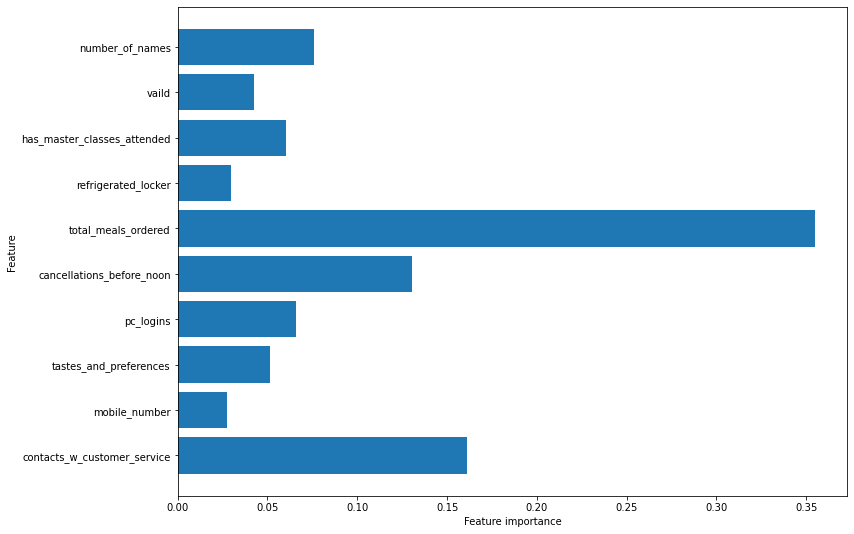

In [47]:
# plotting feature importance
plot_feature_importances(full_tree_fit,
                         train  = x_train,
                         export = False)

# The highest R-Square value of revenue model

The highest R-squared value of revenue = 0.780

# The highest AUC score of cross-sell model

The highest AUC score is 0.719.

In [48]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)

# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7361
Testing  ACCURACY: 0.7823
AUC Score        : 0.7196


# Conclusion
Companies can use the insights derived from these models to guide the company's customer-oriented decisions. Effective models will be able to help companies predict customer behavior and identify key decisions.